# Calculus final project

Let us consider the **House Pricing** dataset, where you have a lot of information about the houses being sold and you aim to produce the price of the house.

In [1]:
import numpy as np
import pandas as pd

### Task 1. Reading

In [2]:
try: 
    datX=np.load(r"C:/x_train.npy")
    datY=np.log(np.load(r'C:/y_train.npy'))
    
except:
    datX=np.load("x_train.npy")
    datY=np.log(np.load('y_train.npy'))
    
datX=pd.DataFrame(datX, columns=datX.dtype.names)
datX

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2014-09-16,5.0,3.25,3710,34200,2.0,False,3,8,2510,1200,1986,0,98074,47.610100,-122.046997
1,2014-11-18,3.0,1.75,2820,8879,1.0,False,5,7,1540,1280,1920,1957,98146,47.509399,-122.375999
2,2014-11-10,3.0,1.00,1240,239144,1.0,False,3,6,1240,0,1921,1992,98038,47.430302,-122.045998
3,2015-04-16,4.0,2.50,2670,8279,2.0,False,3,7,2670,0,1999,0,98148,47.429199,-122.328003
4,2014-07-23,3.0,2.25,2700,4025,2.0,False,4,8,1760,940,1907,0,98122,47.607399,-122.293999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2014-05-21,4.0,2.75,2290,6120,2.0,False,4,7,2170,120,1926,0,98115,47.674599,-122.327003
14996,2015-04-01,3.0,2.00,1430,9250,1.0,False,4,8,990,440,1983,0,98052,47.695202,-122.096001
14997,2014-07-11,2.0,1.00,640,7768,1.0,False,3,6,640,0,1942,0,98106,47.514999,-122.359001
14998,2014-05-15,3.0,1.00,1630,10304,1.0,False,5,7,1630,0,1953,0,98155,47.754799,-122.317001


Okay, we manage to load the data. We are going to use linear models to work with it, but firstly we need to come up with idea what features should we include in the model at all (which feature the price is lineary dependent on):

In order to do it let us plot every feature vs the price. Firstly, we import nice plotting modules:

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

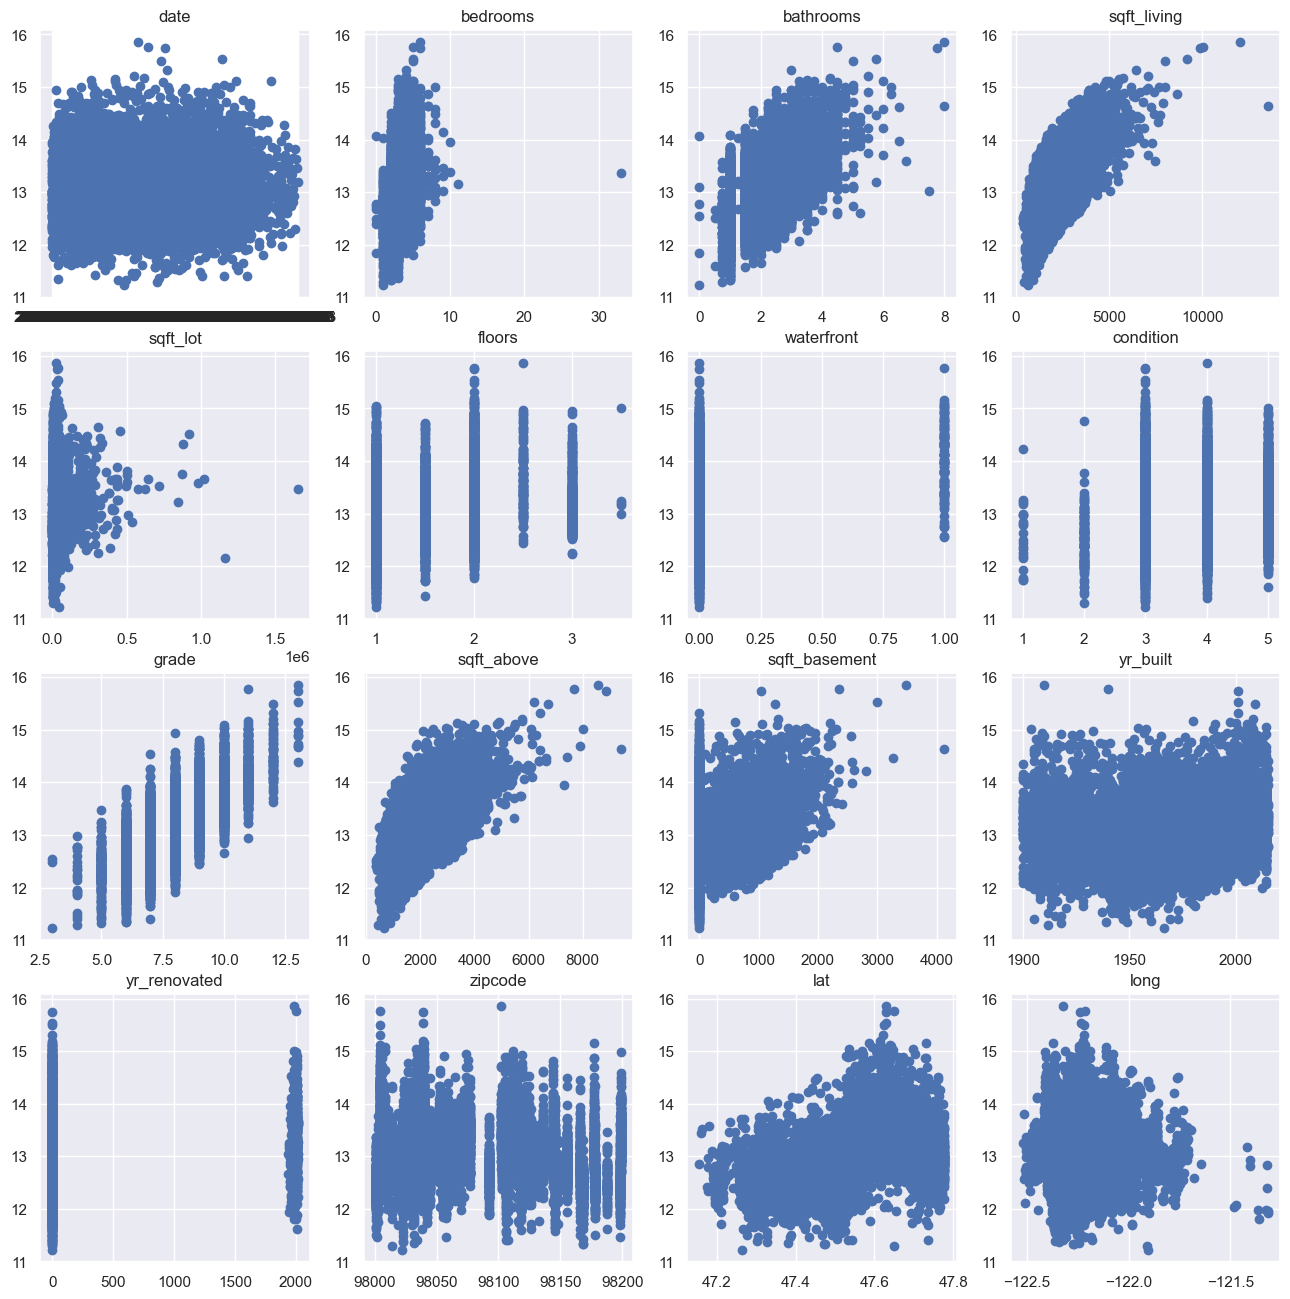

In [5]:
f, ax=plt.subplots(4, 4, figsize=(16,16))

for i, name in enumerate(datX.columns):
    ax[i//4][i%4].scatter(datX[name], datY)
    ax[i//4][i%4].set_title(name)

Let us say, that we choose to work the following set of features:
+ `bedrooms`
+ `bathrooms`
+ `sqft_living`
+ `floors`
+ `condition`
+ `grade`
+ `sqft_above`
+ `sqft_basement`
+ `long`
+ `lat`

Clear the dataset from all the other features and create:
1. matrix $X$, all elements should be real numbers
2. number $N$ -- number of considered houses
3. number $m$ -- number of features

**Hint**: it is easier to clean columns from dataset (you should look [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) for insipration) and the get a matrix with `.values`

In [6]:
desired_features = ["bedrooms", "bathrooms", "sqft_living", "floors", "condition", "grade", "sqft_above", "sqft_basement", "long", "lat"]

X = datX[desired_features].values

N = X.shape[0]

m = X.shape[1]

In [7]:
print(f"Matrix X: \n{X}")
print(f"Number of houses: {N}")
print(f"Number of features: {m}")

Matrix X: 
[[ 5.00000000e+00  3.25000000e+00  3.71000000e+03 ...  1.20000000e+03
  -1.22046997e+02  4.76100998e+01]
 [ 3.00000000e+00  1.75000000e+00  2.82000000e+03 ...  1.28000000e+03
  -1.22375999e+02  4.75093994e+01]
 [ 3.00000000e+00  1.00000000e+00  1.24000000e+03 ...  0.00000000e+00
  -1.22045998e+02  4.74303017e+01]
 ...
 [ 2.00000000e+00  1.00000000e+00  6.40000000e+02 ...  0.00000000e+00
  -1.22359001e+02  4.75149994e+01]
 [ 3.00000000e+00  1.00000000e+00  1.63000000e+03 ...  0.00000000e+00
  -1.22317001e+02  4.77547989e+01]
 [ 2.00000000e+00  1.00000000e+00  7.20000000e+02 ...  0.00000000e+00
  -1.22403999e+02  4.76534004e+01]]
Number of houses: 15000
Number of features: 10


Consider that we are interested in the loss of the model we discussed in the video:

+ Assume we have input data that is denoted as $\vec{x}_1, \vec{x}_2, \ldots, \vec{x}_N$
+ House prices for this input data are known $y_1, y_2, \ldots, y_N$

We propose a **simple linear model** for this task:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

As a loss function we will use the mean squared error (**MSE**):

$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N (y_i-\hat{y}_i)^2
$$

### Task 2. Compute analytically the $Loss(\vec{w})$  function  (1 point)
Please, keep the signature of the function and enter the code only under `your code goes here`.

**Attention**: you need to avoid usage of `for` cycles! The easiest way to do it is by using matrix operations.

_Hint_: to get nice $w_0$ coefficient it is convinient to add to the `X` matrix the column of 1 with `np.concatenate` [documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html)

In [8]:
def loss(w, X, y):
    
    X_new = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    y_hat = X_new @ w
    squared_errors = (y - y_hat) ** 2
    lossValue = (1 / X.shape[0]) * np.sum(squared_errors)
    
    return lossValue

### Task 3. Compute analyticaly the gradient of the $Loss(\vec{w})$ (1 point)
Please, enter your answer in the cell below (it should be a `markdown` cell). You can initially specify each partial derivative $\frac{\partial Loss}{\partial w_i}$, but **your final answer must consists of $\nabla Loss$ altogether using matrix operations**.

MSE Loss:

$$
L(\vec{w}) = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2 = \frac{1}{N} ||y - X\vec{w}||^2
$$

Gradient:

$$
\nabla L(\vec{w}) = -\frac{2}{N} X^T (y - X\vec{w})
$$

### Task 4. Write a function to compute the gradient of the Loss function in the given point  (1 point)
Please, keep the signature of the function and enter the code only under `your code goes here`.

**Attention**: you need to avoid usage of `for` cycles! The easiest way to do it is by using matrix operations.


In [9]:
def grad(w_k, X, y):
    #your code goes here

    N = X.shape[0]

    X_new = np.concatenate((np.ones((N, 1)), X), axis=1)

    lossGradient = (-2 / N) * X_new.T @ (y - X_new @ w_k)

    return lossGradient

### Task 5. Write gradient descent (2 points)
How it is time to formulate the gradient descent! As you remeember, the idea here is that:
$$
\vec{w}^{k+1}=\vec{w}^{k}-\alpha_k\cdot \nabla Loss(\vec{w}^{k})
$$
We propose that you use constant $\alpha_k=\alpha$. Assume that the method should stop in two cases:
+ if the number of iterations is to high (`maxiter`)
+ if the length of the gradient is low enough (<`eps`) to call an extremum

Please, keep the signature of the function and enter the code only under `your code goes here`.

In [10]:
def gradDescent(w_init, alpha, X, y, maxiter=500, eps=1e-2):
    losses=[]
    weights=[w_init]

    curiter=0
    w_k=weights[-1]

    #your code goes here
    while curiter < maxiter and np.linalg.norm(grad(w_k, X, y)) > eps:
        grad_k = grad(w_k, X, y)
        w_k1 = w_k - alpha * grad_k
        loss_value_k = loss(w_k1, X, y)
        weights.append(w_k1)
        losses.append(loss_value_k)
        curiter += 1
        w_k = w_k1

    return weights, losses

Experiment with several alphas and several intial values of weights. To illustrate, provide graphs for the Loss function over iterations in each case (and, optionally, the distance between weigths from one iteration to the next):

(we provided all key plotting commands for you, but you can always look into [this tutorial](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py))

**Note:** You need to provide at least **two** experiments with **different values of $\alpha$** (**1 point**). Preferably, there should be at least one convergent.

C:\Users\Виталий\AppData\Local\Temp\ipykernel_9884\1892945770.py:5: RuntimeWarning: overflow encountered in square
  squared_errors = (y - y_hat) ** 2
C:\Users\Виталий\AppData\Local\Temp\ipykernel_9884\1892945770.py:4: RuntimeWarning: overflow encountered in matmul
  y_hat = X_new @ w
C:\Users\Виталий\AppData\Local\Temp\ipykernel_9884\1457388521.py:8: RuntimeWarning: overflow encountered in matmul
  lossGradient = (-2 / N) * X_new.T @ (y - X_new @ w_k)
C:\Users\Виталий\AppData\Local\Temp\ipykernel_9884\1457388521.py:8: RuntimeWarning: invalid value encountered in matmul
  lossGradient = (-2 / N) * X_new.T @ (y - X_new @ w_k)


<Figure size 800x800 with 0 Axes>

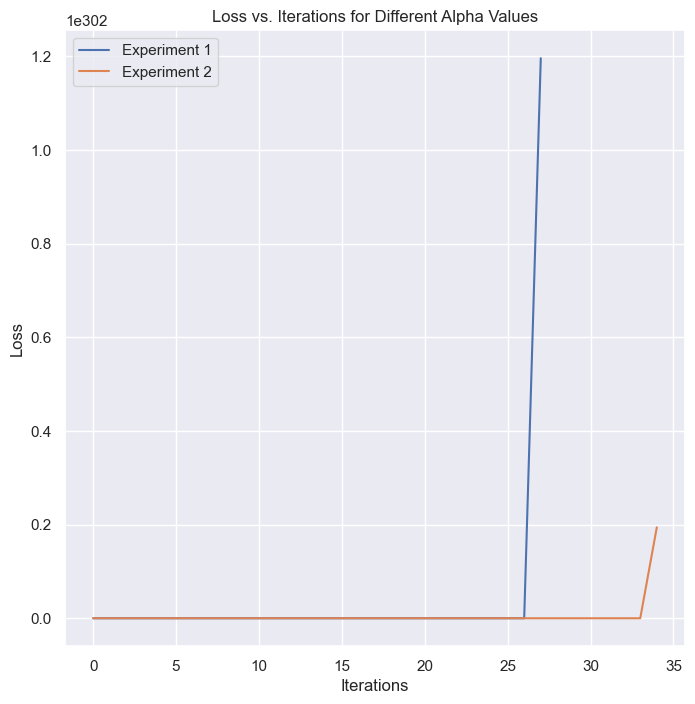

In [11]:
plt.figure(figsize=(8,8))

y_reshaped = datY.reshape(-1, 1)
w_init_one = np.random.randn(X.shape[1] + 1, 1)
w_init_two = np.random.randn(X.shape[1] + 1, 1)

alpha_1 = 10**-2
weights_1, losses_1 = gradDescent(w_init_one, alpha_1, X, y_reshaped)

alpha_2 = 10**-3
weights_2, losses_2 = gradDescent(w_init_two, alpha_2, X, y_reshaped)


plt.figure(figsize=(8, 8))
plt.plot(losses_1, label="First experiment")
plt.plot(losses_2, label="Second experiment")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs. Iterations for Different Alpha Values")
plt.legend()
plt.show()

Let us check the adequacy of the model we created.

Choose several (no less then five) houses (inputs in your `X` matrix) and calculte predicted prices by:

$$ \hat{y}_i=w_0+w_1x_1+w_2x_2+\ldots+w_mx_m $$

In [12]:
#Failed to do this task

Compare predicted values with an actual answer (stored in your `y` array). Is it satisfying enough? (**1 point**)

### Task 6. Data transformation

As you have probably already seen above, the convergence of the gradient descent is not ideal for our data. One way to overcome this is to transform the input data so that:
+ the **average** of each feature should be $0$
+ the **standard deviation** of each feature should be $1$

In such a way levels of the loss function would be close to circles; thus one should hope to faster convergence.

Implement such normalisation:

In [13]:
def norm(X):
    # your code goes here
    col_means = X.mean(axis=0)
    col_stds = X.std(axis=0)
    X = np.where(col_stds != 0, (X - col_means) / col_stds, X)
    
    return X

### Task 7. And again (2 points)

Repeat gradient descent experiments for different $\alpha$s, now with transformed data.

+ Run at least two experiments with different $\alpha$
+ At least two experiments should be convergent

1. Provide `loss` plots for those experiments (on the same graph). (**1 point**)
2. Are optimized weights the same? Illustrate it (plot it or show differences in other way)

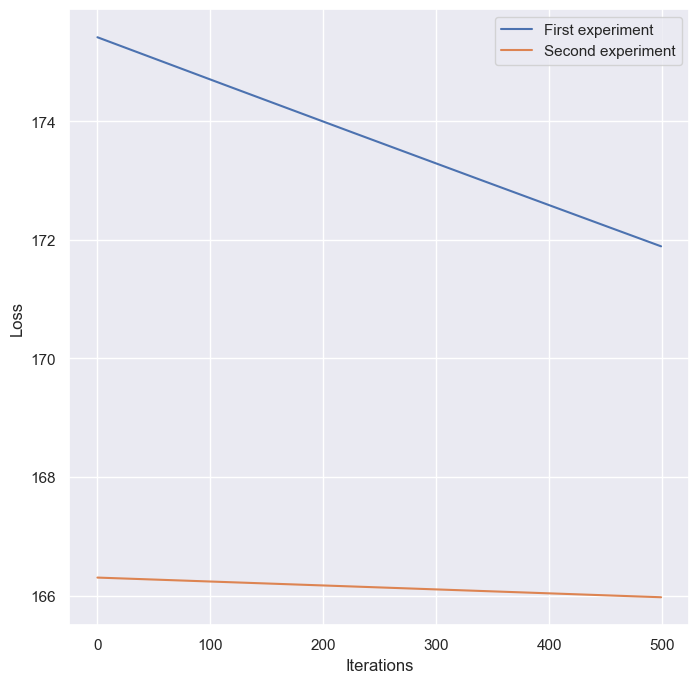

In [14]:
w_init_one = np.random.randn(X.shape[1] + 1, 1)
alpha_1 = 10**-5
weights_1_optimized, losses_1 = gradDescent(w_init_one, alpha_1, norm(X), y_reshaped)

w_init_two = np.random.randn(X.shape[1] + 1, 1)
alpha_2 = 10**-6
weights_2_optimized, losses_2 = gradDescent(w_init_two, alpha_2, norm(X), y_reshaped)


plt.figure(figsize=(8, 8))
plt.plot(losses_1, label="First experiment")
plt.plot(losses_2, label="Second experiment")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


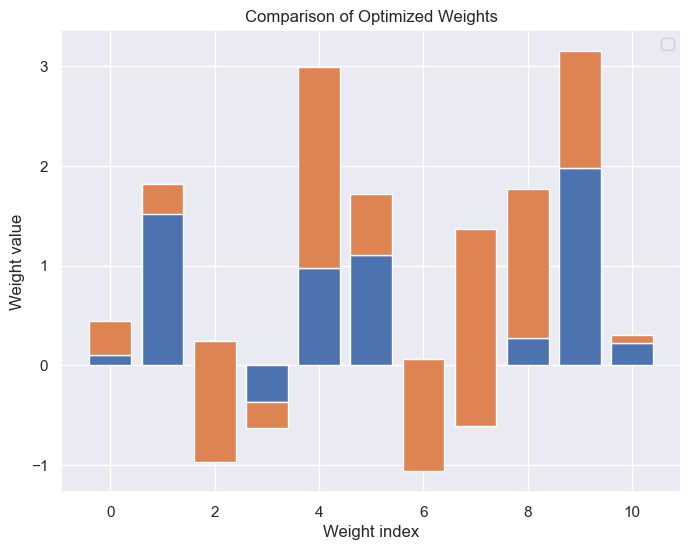

In [15]:
plt.figure(figsize=(8, 6))
plt.bar(range(len(weights_1_optimized[0])), weights_1_optimized[0].flatten())
plt.bar(range(len(weights_2_optimized[0])), weights_2_optimized[0].flatten(), bottom=weights_1_optimized[0].flatten())
plt.xlabel("Weight index")
plt.ylabel("Weight value")
plt.title("Comparison of Optimized Weights")
plt.legend()
plt.show()



### Task 8. Better pay twice  (1 point)

Sometimes it is essential to alter the loss function and make it assymetric. Normally, it is motivated by the task itself. For instance, in our case assume that one uses our prediction to bid for an apartment: hence if our $\hat{y}>y$ then we will overpay, but if $\hat{y}<y$ we will not get an apartment, but also won't lose any money.

Let us introduce our new function:
$$
Loss(\vec{w})=\frac{1}{N}\sum_{i=1}^N \begin{cases} a(y_i-\hat{y}_i)^2, \quad y_i>\hat{y}_i \\ b(y_i-\hat{y}_i)^2, \quad y_i\le\hat{y}_i \end{cases}
$$

Implement new loss and new gradient:

In [16]:
def new_loss(w, X, y, a, b):

    X = norm(X)
    X_new = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    y_reshaped = y.reshape(-1, 1)

    errors = y_reshaped - X_new @ w

    positive_errors = errors[errors > 0]
    negative_errors = errors[errors <= 0]
    lossValue = (1/X.shape[0]) * (a * np.sum(positive_errors**2) + b * np.sum(negative_errors**2))

    return lossValue

def new_grad(w_k, X, y, a, b):

    X = norm(X)
    X_new = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    y_reshaped = y.reshape(-1, 1)

    errors = y_reshaped - X_new @ w_k

    positive_idx = np.where(errors > 0)[0]
    negative_idx = np.where(errors <= 0)[0]
    X_positive = X_new[positive_idx]
    X_negative = X_new[negative_idx]
    errors_positive = errors[positive_idx]
    errors_negative = errors[negative_idx]


    grad_positive = -(2/X.shape[0]) * a * X_positive.T @ errors_positive
    grad_negative = -(2/X.shape[0]) * b * X_negative.T @ errors_negative

    lossGradient = grad_positive + grad_negative

    return lossGradient

### Task 9. More experiments! (2 points)

Now let us experiment with new functions (**2 points**)

1. Assume your data was normalised (otherwise repeat **Task 6**)
2. Select at least two pairs of $(a,b)$ parameters such that $a_1/b_1>1$ and $a_2/b_2<1$
3. Run **gradient descent** with new function and given parameters
4. Make a `loss` plot for each expriment (please, provide legend!)
5. Check whether you've got coinciding weights and _illustrate_ it

You may also alter $\alpha$ and provide more experiments on composite relation between $a/b$ and $\alpha$ values (_optional_).

In [17]:
def gradDescent_new (w_init, alpha, X, y, a, b, maxiter=500, eps=1e-2):

    losses = []
    weights = [w_init]
    curiter = 0
    w_k = weights[-1]

    while curiter <= maxiter and np.linalg.norm(new_grad(w_k, X, y, a, b)) >= eps:
        grad_k = new_grad(w_k, X, y, a, b)
        w_k1 = w_k - alpha * grad_k
        loss_value_k = new_loss(w_k, X, y, a, b)
        weights.append(w_k1)
        losses.append(loss_value_k)
        curiter += 1
        w_k = w_k1

    return weights, losses

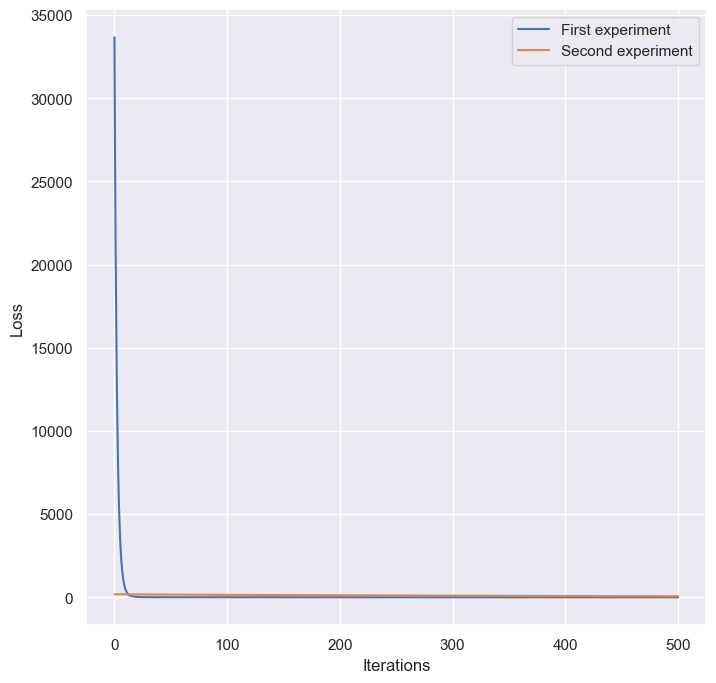

In [18]:
a1, b1 = 200, 1
a2, b2 = 1, 40
alpha = 0.0005
w_init_one = np.random.randn(X.shape[1] + 1, 1)
w_init_two = np.random.randn(X.shape[1] + 1, 1)

weights_1, losses_1 = gradDescent_new(w_init_one, alpha, norm(X), y_reshaped, a1, b1)
weights_2, losses_2 = gradDescent_new(w_init_two, alpha, norm(X), y_reshaped, a2, b2)

plt.figure(figsize=(8, 8))
plt.plot(losses_1, label="First experiment")
plt.plot(losses_2, label="Second experiment")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


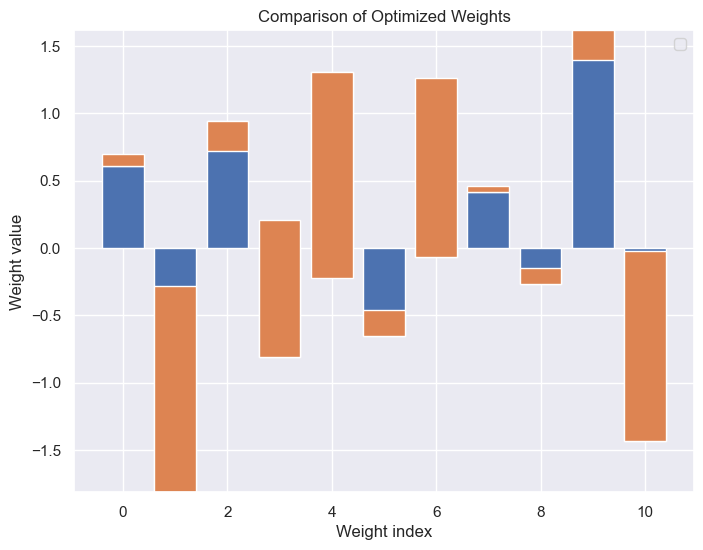

In [19]:
plt.figure(figsize=(8, 6))
plt.bar(range(len(weights_1[0])), weights_1[0].flatten())
plt.bar(range(len(weights_2[0])), weights_2[0].flatten(), bottom=weights_1[0].flatten())
plt.xlabel("Weight index")
plt.ylabel("Weight value")
plt.title("Comparison of Optimized Weights")
plt.legend()
plt.show()


### Task 10. Discussion (1 point)
Answer following questions:
1. Have you managed to get sufficiently different weights with different $\alpha$ or $(a,b)$ parameters of assymetry? What does it mean?
2. Assume $a$ and $b$ are not given by the task and you need to choose them with the data. Propose a strategy of doing that (assume $a=1$ and choosing only $b$).

##### 1. Different a and b values don't dramatically change the final weights, but they do affect how fast the model learns.

##### 2. We can try different b values across huge ranges, like 0.1, 0.01, 0.001, and so on. For each b, we see how fast the model learns (how quickly the error drops). The b that makes the model learn fastest and most smoothly is the best one for our data.